#Анализ химических характеристик красного вина 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('winequality-red.csv', sep = ';')
df.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1424,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
1494,6.4,0.31,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,7
1377,5.2,0.49,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2,6
1409,6.0,0.51,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,6
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
241,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,6
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,5
992,6.5,0.40,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6


2. На основе переменной quality создать новую переменную good: если quality > 5, то 1, иначе 0

In [ ]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


3. Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм 

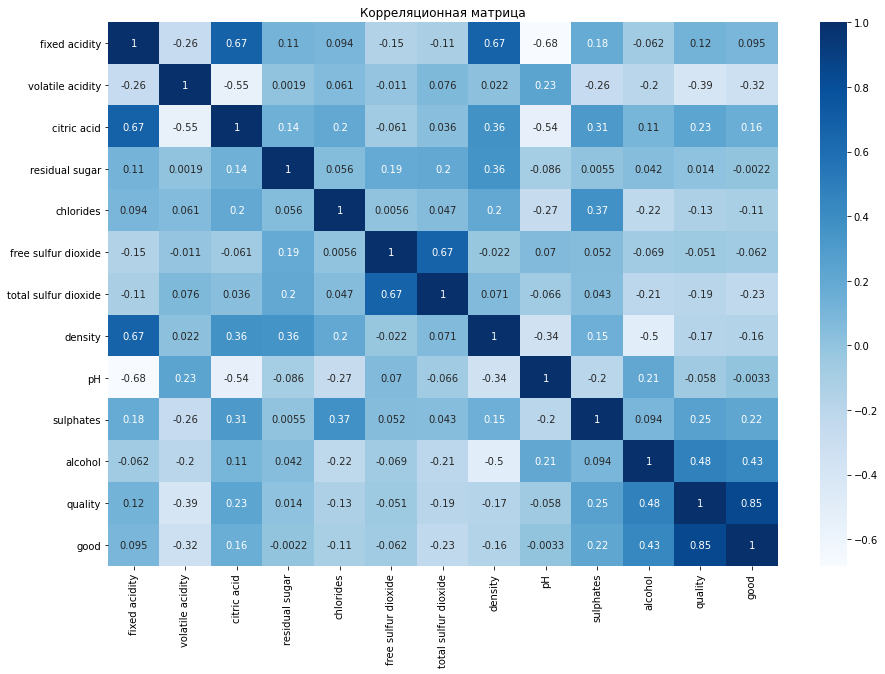

In [ ]:
correlation = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционная матрица')
plt.show()

По корреляционной матрице четкой линейной зависимости качества вина от других показателей не прослеживается. Самые высокие показатели - спиртозность (alcohol) и летучая кислотность (летучая кислотность). Проверим влияние этих показателей с помощью других графиков

In [ ]:
data = df.groupby('quality')['alcohol'].mean().reset_index()
data.head()

,quality,alcohol
0,3,9.955000
1,4,10.265094
2,5,9.899706
3,6,10.629519
4,7,11.465913


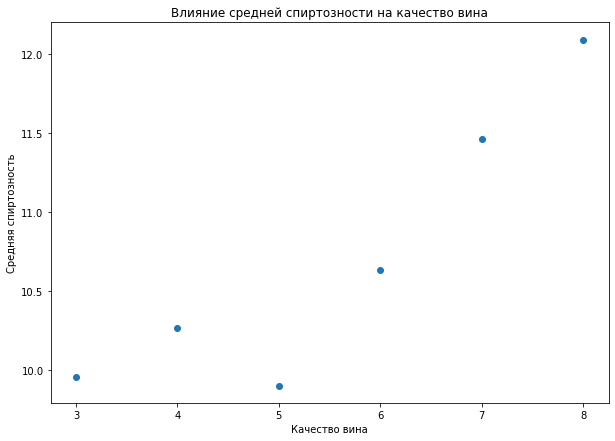

In [ ]:
plt.figure(figsize = (10,7))

plt.scatter(data['quality'], data['alcohol'])

plt.title('Влияние средней спиртозности на качество вина')
plt.xlabel('Качество вина')
plt.ylabel('Средняя спиртозность')

plt.show()

При росте средней спиртозности вина увеличивается и категория его качества. Чем выше градус, тем лучше вино

In [ ]:
data = df.groupby('quality')['volatile acidity'].mean().reset_index()
data.head()

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920


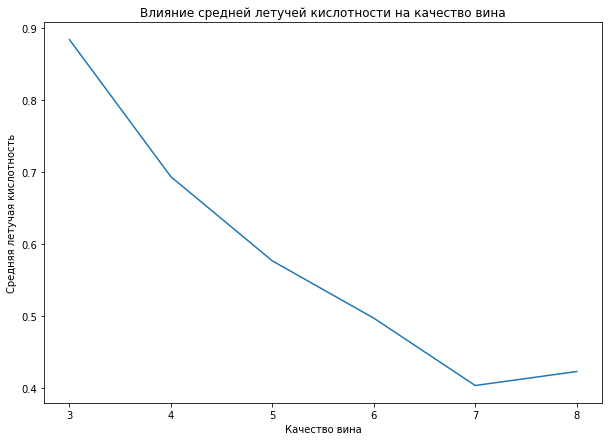

In [ ]:
plt.figure(figsize = (10,7))

plt.plot(data['quality'], data['volatile acidity'])

plt.title('Влияние средней летучей кислотности на качество вина')
plt.xlabel('Качество вина')
plt.ylabel('Средняя летучая кислотность')

plt.show()

Также прослеживается обратная зависимость средней летучей кислотности и качества вина. Чем ниже летучая кислотность, тем лучше красное вино

In [ ]:
# проверим зависимость от сульфатов
data1 = df['sulphates'].loc[df['good'] == 1]
data2 = df['sulphates'].loc[df['good'] == 0]
data1.head()

3     0.58
7     0.47
8     0.57
16    0.75
19    1.08
Name: sulphates, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


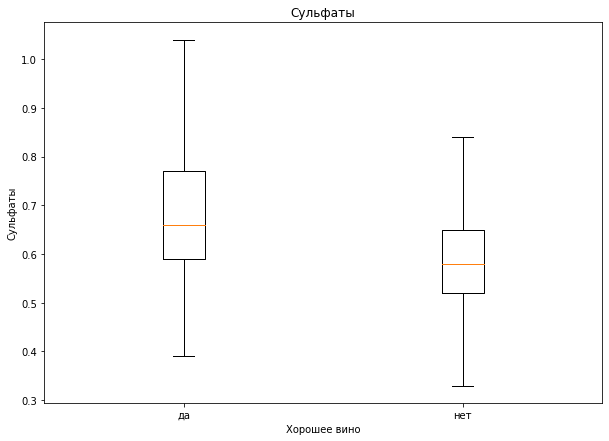

In [ ]:
plt.figure(figsize = (10,7))

plt.boxplot([data1, data2], showfliers = False)

plt.title('Сульфаты')
plt.xlabel('Хорошее вино')
plt.ylabel('Сульфаты')
plt.xticks([1, 2],['да', 'нет'])

plt.show()

Незначительно на качество вина также влияет и количество в нем сульфатов. В хорошем вине сульфатов больше

In [ ]:
# Проверим зависимость от содержания лимонной кислоты
data = df.groupby('quality')['citric acid'].mean().reset_index()
data.head()

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176


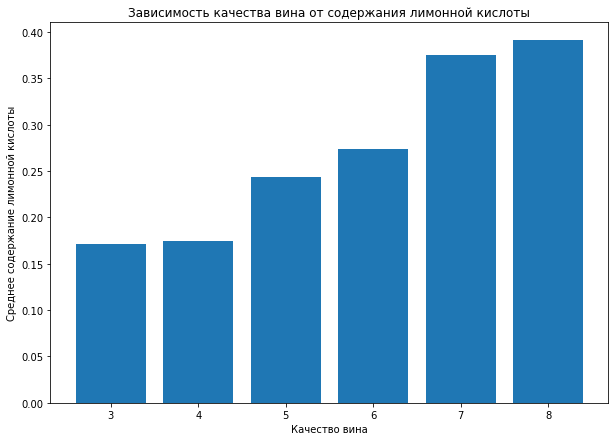

In [ ]:
plt.figure(figsize = (10,7))

plt.bar(data['quality'],data['citric acid'])

plt.title('Зависимость качества вина от содержания лимонной кислоты')
plt.xlabel('Качество вина')
plt.ylabel('Среднее содержание лимонной кислоты')

plt.show()

Среднее содержание лимонной кислоты также влияет на категорию красного вина. В хорошем вине лимонной кислоты содержится больше

In [ ]:
# Изучим влияние остаточного сахара в вине
data1 = df.loc[df['good'] == 0].groupby('residual sugar')['pH'].agg(count = 'count').reset_index().sort_values(by = 'residual sugar')
data2 = df.loc[df['good'] == 1].groupby('residual sugar')['pH'].agg(count = 'count').reset_index().sort_values(by = 'residual sugar')
data1.head()

,residual sugar,count
0,1.2,2
1,1.3,3
2,1.4,15
3,1.5,17
4,1.6,38


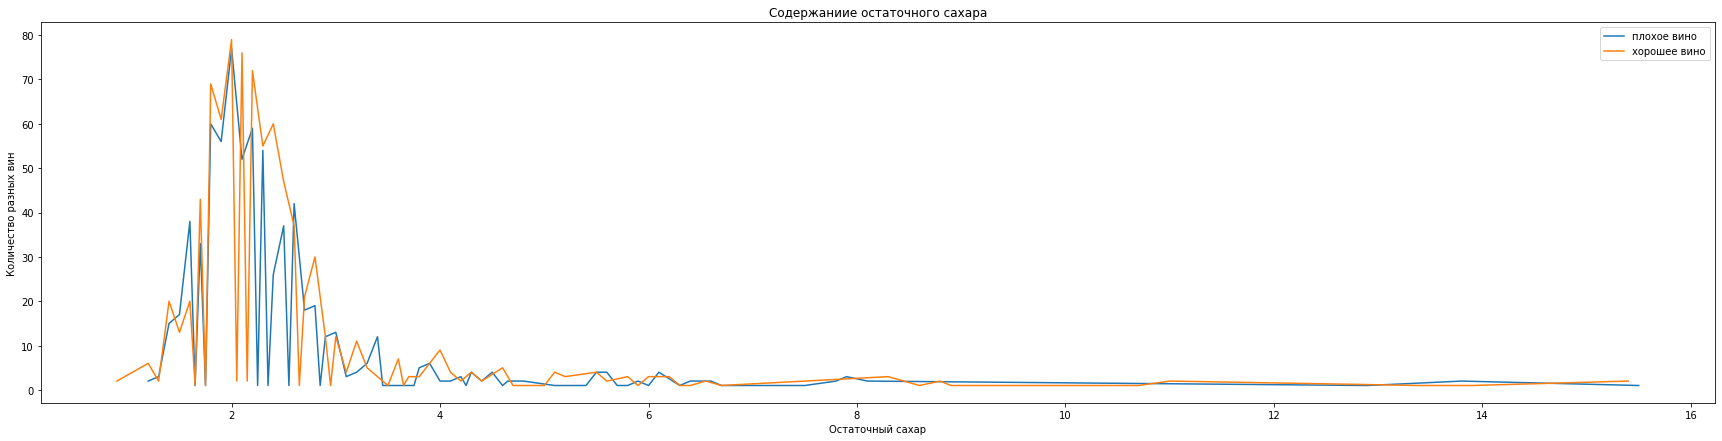

In [ ]:
plt.figure(figsize = (30,7))

plt.plot(data1['residual sugar'], data1['count'])
plt.plot(data2['residual sugar'], data2['count'])

plt.title('Содержаниие остаточного сахара')
plt.xlabel('Остаточный сахар')
plt.ylabel('Количество разных вин')
plt.legend(['плохое вино','хорошее вино'])

plt.show()

Четкого влияния сахарозности на качество вина не прослеживается

In [ ]:
# Посмотрим зависимость других переменных 
data = df[['good', 'fixed acidity',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH']]
data.head()

,good,fixed acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH
0,0,7.4,0.076,11.0,34.0,0.9978,3.51
1,0,7.8,0.098,25.0,67.0,0.9968,3.20
2,0,7.8,0.092,15.0,54.0,0.9970,3.26
3,1,11.2,0.075,17.0,60.0,0.9980,3.16
4,0,7.4,0.076,11.0,34.0,0.9978,3.51


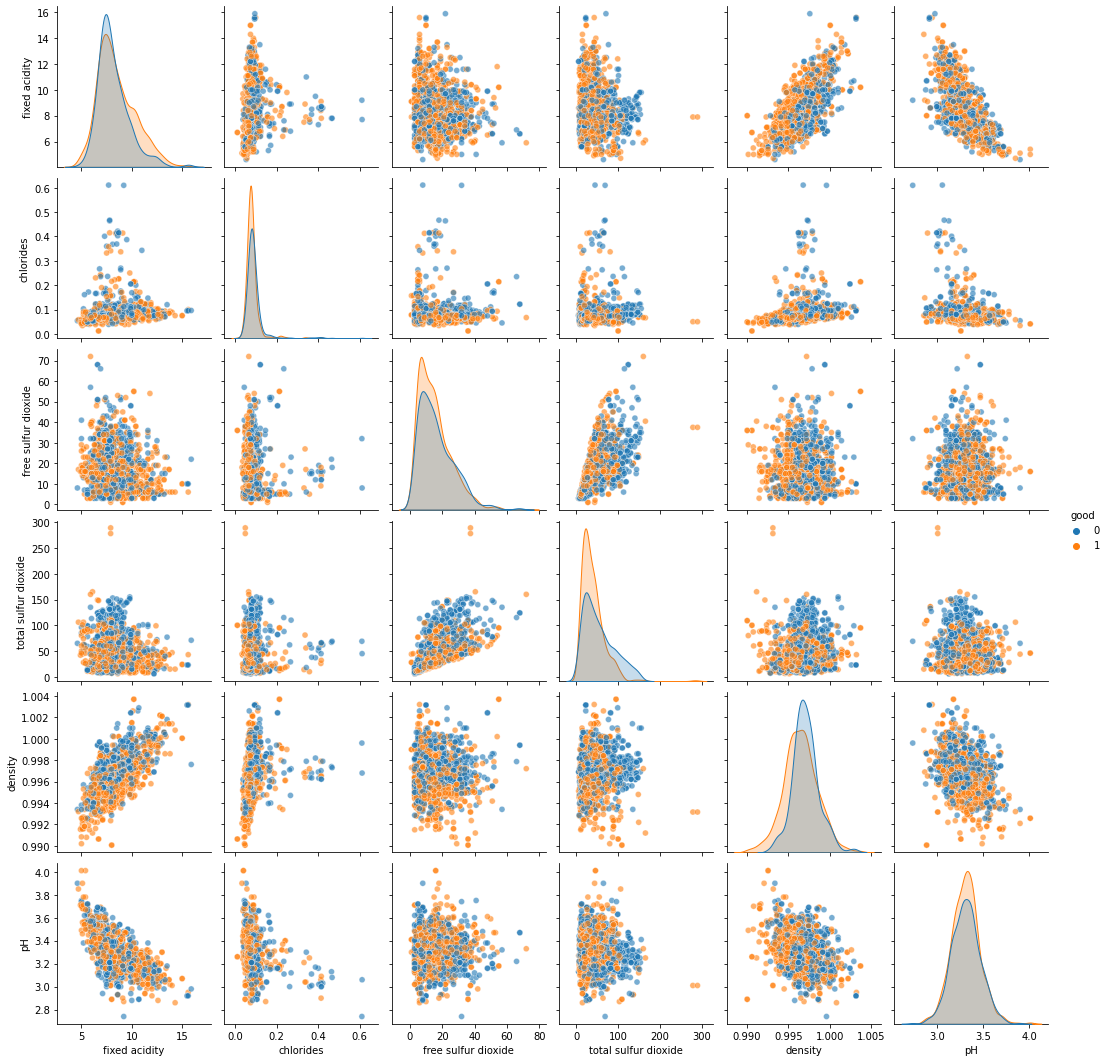

In [ ]:
sns.pairplot(data, hue = 'good', plot_kws = {'alpha': 0.6})

Также не удается увидеть зависимость остальных переменных на качество вина.

Таким образом, прямые влияние на качество вина оказывают спиртозность, содержание лимонной кислоты и сульфатов. Обратное влияние оказывает летучая кислотность